* The idea of today's exercise is to do a more powerful EDA. For example:
* do same aggregations, explore one shop in detail, see for a single product how many sales it has across time, what are the most sold * items categories per month...
* The idea is that you have yo be very curious with the data

In [86]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import glob
from googletrans import Translator



In [12]:
path = r'C:\Users\Amash\Projects\Strive\Exercises\Module_4_Feature_Engineering\Week_1\D3_Num_Encoding\data'

In [15]:
files = glob.glob(path + '\*.csv')

In [16]:
files

['C:\\Users\\Amash\\Projects\\Strive\\Exercises\\Module_4_Feature_Engineering\\Week_1\\D3_Num_Encoding\\data\\items.csv',
 'C:\\Users\\Amash\\Projects\\Strive\\Exercises\\Module_4_Feature_Engineering\\Week_1\\D3_Num_Encoding\\data\\item_categories.csv',
 'C:\\Users\\Amash\\Projects\\Strive\\Exercises\\Module_4_Feature_Engineering\\Week_1\\D3_Num_Encoding\\data\\sales_train.csv',
 'C:\\Users\\Amash\\Projects\\Strive\\Exercises\\Module_4_Feature_Engineering\\Week_1\\D3_Num_Encoding\\data\\sample_submission.csv',
 'C:\\Users\\Amash\\Projects\\Strive\\Exercises\\Module_4_Feature_Engineering\\Week_1\\D3_Num_Encoding\\data\\shops.csv',
 'C:\\Users\\Amash\\Projects\\Strive\\Exercises\\Module_4_Feature_Engineering\\Week_1\\D3_Num_Encoding\\data\\test.csv']

In [51]:
dfs = []
for file in files:
    df_name = file[98:-4]
    dfs.append(df_name)
    vars()[file[98:-4]] = pd.read_csv(file)

In [54]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [118]:
path_translated = r'C:\Users\Amash\Projects\Strive\Exercises\Module_4_Feature_Engineering\Week_1\D4_Cat_Encoding\data\translated'

In [119]:
files_translated = glob.glob(path_translated + '\*.csv')

In [120]:
files_translated[0][109:-4]

'items_translated'

In [129]:

for file in files_translated:
    df_name = file[109:-4]
    dfs.append(df_name)
    vars()[file[109:-4]] = pd.read_csv(file)

In [216]:
items_merged = items_translated.merge(items, on='item_id').drop('item_name', axis=1)

In [217]:
items_merged

,item_id,item_name_translated,item_category_id
0,0,!! IN THE POWER OF HAPPINESS (PLAST) D,40
1,1,! ABBYY FineReader 12 Professional Edition Ful...,76
2,2,*** IN THE GLORY OF THE GLORY (UNV) D,40
3,3,*** BLUE WAVE (Univ) D,40
4,4,*** BOX (GLASS) D,40
...,...,...,...
22165,22165,"Nuclear Titbit 2 [PC, Digital Version]",31
22166,22166,Query language 1C: Enterprise [Digital version],54
22167,22167,The query language is 1C: Enterprise 8 (+ CD)....,49
22168,22168,Egg for Little Inu,62


In [196]:
sales_train.merge(items, on='item_id', how='left').merge(item_categories, on='item_category_id', how='left').merge(shops, on='shop_id', how='left')

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name
0,02.01.2013,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
1,03.01.2013,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,"Москва ТРК ""Атриум"""
2,05.01.2013,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,"Москва ТРК ""Атриум"""
3,06.01.2013,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58,Музыка - Винил,"Москва ТРК ""Атриум"""
4,15.01.2013,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Музыка - CD фирменного производства,"Москва ТРК ""Атриум"""
...,...,...,...,...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0,V/A Nu Jazz Selection (digipack),55,Музыка - CD локального производства,"Москва ТРК ""Атриум"""
2935845,09.10.2015,33,25,7460,299.00,1.0,V/A The Golden Jazz Collection 1 2CD,55,Музыка - CD локального производства,"Москва ТРК ""Атриум"""
2935846,14.10.2015,33,25,7459,349.00,1.0,V/A The Best Of The 3 Tenors,55,Музыка - CD локального производства,"Москва ТРК ""Атриум"""
2935847,22.10.2015,33,25,7440,299.00,1.0,V/A Relax Collection Planet MP3 (mp3-CD) (jewel),57,Музыка - MP3,"Москва ТРК ""Атриум"""


In [223]:
df_full = sales_train.merge(items_merged, on='item_id', how='left').merge(shops_translated, on='shop_id', how='left').merge(item_categories_translated, on='item_category_id', how='left')

In [226]:
df_full['date'] = pd.to_datetime(df_full['date'])

In [227]:
df_full.set_index('date', inplace=True)

In [237]:
df_full.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name_translated,item_category_id,shop_name_translated,item_category_name_translated
date,,,,,,,,,
2013-02-01,0,59,22154,999.00,1.0,SCENE 2012 (BD),37,"Yaroslavl Shopping center ""Altair""",Cinema - Blu-Ray
2013-03-01,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58,"Moscow TRK ""Atrium""",Music - Vinyl
2013-05-01,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,58,"Moscow TRK ""Atrium""",Music - Vinyl
2013-06-01,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58,"Moscow TRK ""Atrium""",Music - Vinyl
2013-01-15,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,"Moscow TRK ""Atrium""",Music - CD of branded production


In [283]:
count_by_shopname_cat = df_full.groupby(['shop_name_translated', 'item_category_name_translated'])['item_cnt_day'].sum().reset_index().sort_values(by='item_cnt_day', ascending=False).reset_index(drop=True)

In [284]:
count_by_shopname_cat.head()

,shop_name_translated,item_category_name_translated,item_cnt_day
0,"Moscow ТЦ ""Семеновский""",Cinema - DVD,76069.0
1,"Moscow TRK ""Atrium""",Cinema - DVD,45176.0
2,"Khimki ТЦ ""Mega""",Cinema - DVD,44904.0
3,"Yakutsk Ordzhonikidze, 56",Cinema - DVD,44589.0
4,"Moscow ТЦ ""MEGA Teply Stan"" II",Cinema - DVD,38588.0


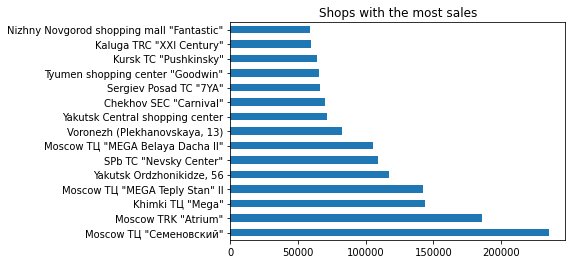

In [360]:
top_15_shops.plot(kind='barh');
plt.title('Shops with the most sales');

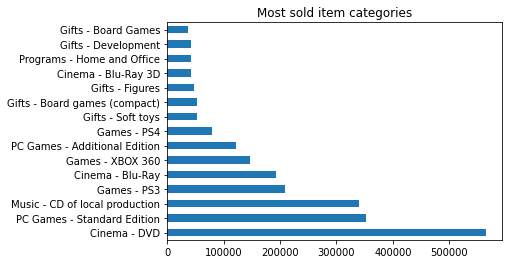

In [361]:
top_15_item_cats.plot(kind='barh');
plt.title('Most sold item categories');

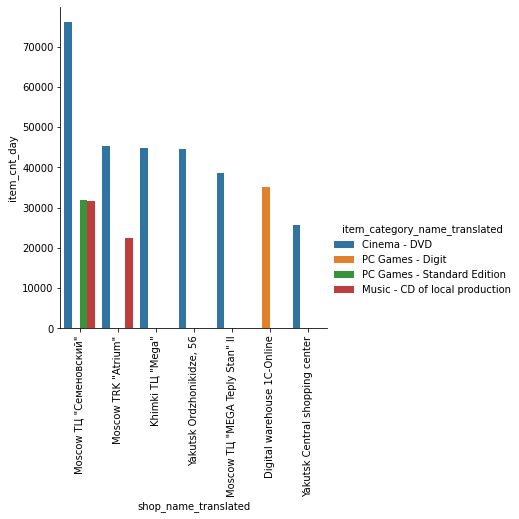

In [287]:
sns.catplot(data=count_by_shopname_cat[:10], x='shop_name_translated', y='item_cnt_day', kind='bar', hue='item_category_name_translated')
plt.xticks(rotation=90);
plt.title('Shops with the most sales');

In [257]:
top_15_items = df_full['item_name_translated'].value_counts()[:15]

In [258]:
top_15_shops = df_full['shop_name_translated'].value_counts()[:15]

In [259]:
top_15_item_cats = df_full['item_category_name_translated'].value_counts()[:15]

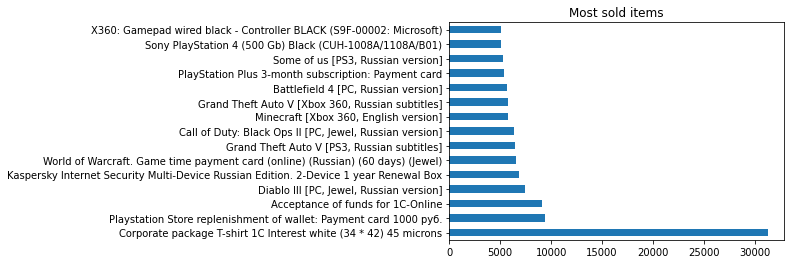

In [359]:
top_15_items.plot(kind='barh');
plt.title('Most sold items');

In [330]:
grouped_by_shop_name = df_full.reset_index().groupby(['shop_name_translated', 'date'])[['item_cnt_day']].count().sort_values(by='item_cnt_day', ascending=False)

Text(0.5, 1.0, 'No of items sold by Moscow ТЦ "Семеновский from Jan 2013 to 2015')

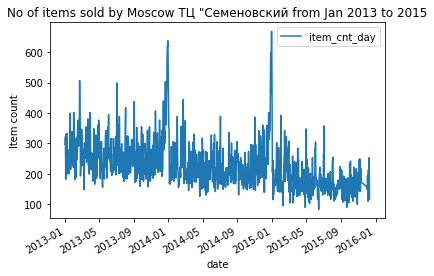

In [335]:
grouped_by_shop_name.loc['Moscow ТЦ "Семеновский"'].plot();
plt.ylabel('Item count');
plt.title('No of items sold by Moscow ТЦ "Семеновский from Jan 2013 to 2015');

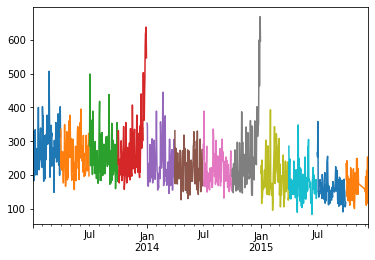

In [333]:
d.loc['Moscow ТЦ "Семеновский"'].resample('Q').plot();
plt.ylabel('Item count');
plt.title('Quarterly Sales by Moscow ТЦ "Семеновский from Jan 2013 to 2015');

<Figure size 1008x720 with 0 Axes>

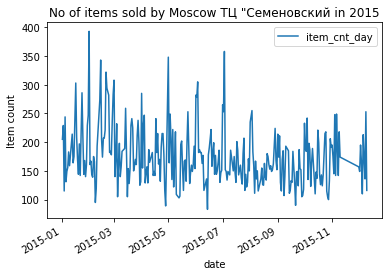

In [355]:
plt.figure(figsize=(14, 10))
grouped_by_shop_name.loc['Moscow ТЦ "Семеновский"'].loc['2015'].plot();
plt.ylabel('Item count');
plt.title('No of items sold by Moscow ТЦ "Семеновский in 2015');

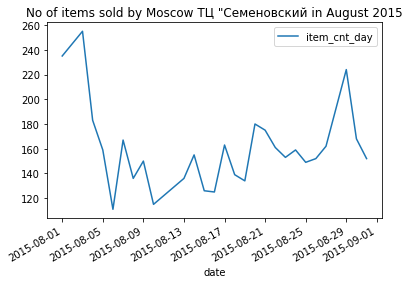

In [368]:
grouped_by_shop_name.loc['Moscow ТЦ "Семеновский"'].loc['2015-8'].plot();
plt.title('No of items sold by Moscow ТЦ "Семеновский in August 2015');

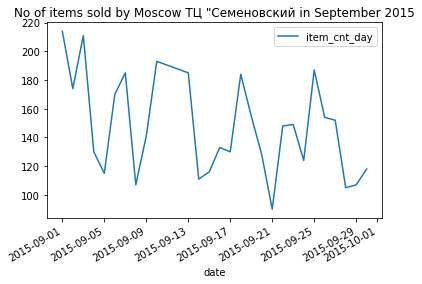

In [366]:
grouped_by_shop_name.loc['Moscow ТЦ "Семеновский"'].loc['2015-9'].plot();
plt.title('No of items sold by Moscow ТЦ "Семеновский in September 2015');

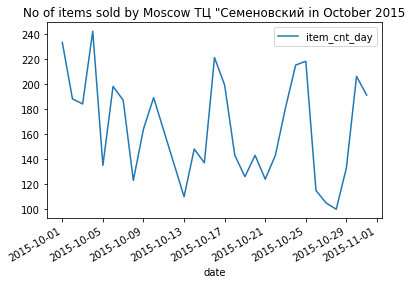

In [367]:
grouped_by_shop_name.loc['Moscow ТЦ "Семеновский"'].loc['2015-10'].plot();
plt.title('No of items sold by Moscow ТЦ "Семеновский in October 2015');